#**KNN - Regression (Scratch)**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import load_diabetes, load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import MaxAbsScaler, PowerTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, explained_variance_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

**Code**

In [2]:
class KNNRegressor:
  def __init__(self, n_neighbors=3, weights='uniform', metric='euclidean', p=2, normalize=False):
    self.n_neighbors = n_neighbors
    self.weights = weights
    self.metric = metric
    self.p = p  # For Minkowski distance
    self.normalize = normalize

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y
    if self.normalize:
        self.scaler = StandardScaler()
        self.X_train = self.scaler.fit_transform(self.X_train)

  def predict(self, X):
    if self.normalize:
        X = self.scaler.transform(X)
    return np.array([self._predict(x) for x in X])

  def _predict(self, x):
    distances = self._compute_distances(x)
    k_indices = np.argsort(distances)[:self.n_neighbors]
    k_nearest_values = [self.y_train[i] for i in k_indices]

    if self.weights == 'uniform':
        return np.mean(k_nearest_values)
    elif self.weights == 'distance':
        weights = 1 / (distances[k_indices] + 1e-5)  # Small value to prevent division by zero
        return np.dot(weights, k_nearest_values) / np.sum(weights)
    elif callable(self.weights):
        weights = self.weights(distances[k_indices])  # Custom weight function
        return np.dot(weights, k_nearest_values) / np.sum(weights)

  def _compute_distances(self, x):
    if self.metric == 'euclidean':
        return np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
    elif self.metric == 'manhattan':
        return np.sum(np.abs(self.X_train - x), axis=1)
    elif self.metric == 'minkowski':
        return np.sum(np.abs(self.X_train - x) ** self.p, axis=1) ** (1 / self.p)
    elif self.metric == 'cosine':
        return 1 - np.dot(self.X_train, x) / (np.linalg.norm(self.X_train, axis=1) * np.linalg.norm(x))
    else:
        raise ValueError(f"Unsupported metric: {self.metric}")

**Load Dataset**

In [3]:
# Load California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [4]:
print(X.shape), print(y.shape)
print(X[:5])
print(y[:5])

(20640, 8)
(20640,)
[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]
[4.526 3.585 3.521 3.413 3.422]


In [5]:
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 8), (6192, 8), (14448,), (6192,))

**Train**

In [6]:
# Initialize and train the KNN regressor
knn_regressor = KNNRegressor(n_neighbors=5, weights='distance', metric='minkowski', p=3, normalize=True)
knn_regressor.fit(X_train, y_train)

**Evaluation**

In [7]:
# Predict and evaluate
y_pred = knn_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.4463728310927078


**Visualization**

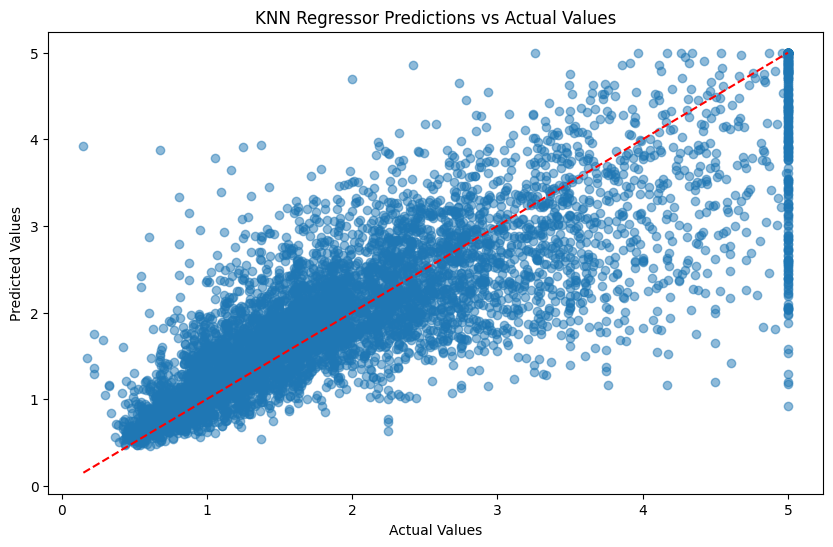

In [8]:
# Optional: Visualize predictions vs actual values if the dataset allows it (for simplicity, we can take first two features)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regressor Predictions vs Actual Values')
plt.show()

In [9]:
# Function to visualize predictions vs actual values
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.show()

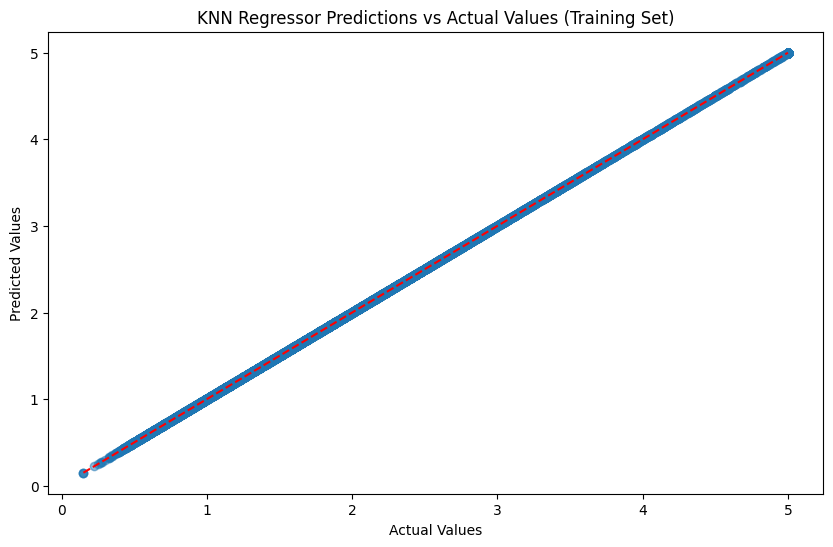

In [10]:
# Visualization for training set
y_train_pred = knn_regressor.predict(X_train)
plot_predictions(y_train, y_train_pred, 'KNN Regressor Predictions vs Actual Values (Training Set)')

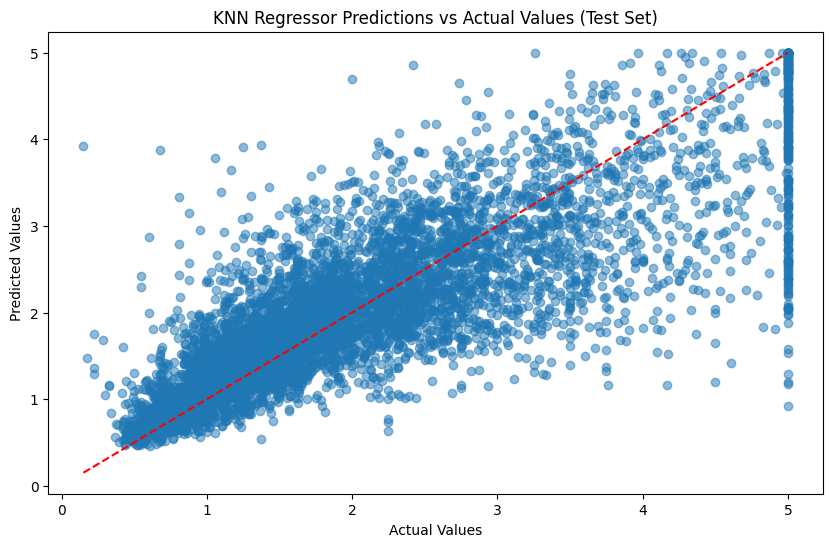

In [11]:
# Visualization for test set
y_test_pred = knn_regressor.predict(X_test)
plot_predictions(y_test, y_test_pred, 'KNN Regressor Predictions vs Actual Values (Test Set)')